In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
import warnings
import urllib

warnings.filterwarnings("ignore")

# 데이터 다운로드
url = 'https://storage.googleapis.com/javalove93-samples/kaggle/corona2/covid_19_data.csv'
# data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',', skip_header=1)
# df = pd.DataFrame(data)
!wget $url -O covid_19_data.csv
!wc -l covid_19_data.csv
!head covid_19_data.csv

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


--2020-06-03 06:30:04--  https://storage.googleapis.com/javalove93-samples/kaggle/corona2/covid_19_data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2210883 (2.1M) [application/octet-stream]
Saving to: ‘covid_19_data.csv’

covid_19_data.csv   100%[===================>]   2.11M  --.-KB/s    in 0.02s   

2020-06-03 06:30:05 (96.3 MB/s) - ‘covid_19_data.csv’ saved [2210883/2210883]

33212 covid_19_data.csv
SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2

In [ ]:
df = pd.read_csv("covid_19_data.csv")
df.ObservationDate = pd.to_datetime(df.ObservationDate)
df = df.set_index('ObservationDate')

# 데이터를 출력해 보면 Month와 #Passengers라는 두 개의 필드를 가진 데이터
print(df)
df.head()

                   SNo      Province/State  ... Deaths Recovered
ObservationDate                             ...                 
2020-01-22           1               Anhui  ...    0.0       0.0
2020-01-22           2             Beijing  ...    0.0       0.0
2020-01-22           3           Chongqing  ...    0.0       0.0
2020-01-22           4              Fujian  ...    0.0       0.0
2020-01-22           5               Gansu  ...    0.0       0.0
...                ...                 ...  ...    ...       ...
2020-06-01       33207           Zacatecas  ...   35.0     202.0
2020-06-01       33208  Zakarpattia Oblast  ...   28.0     405.0
2020-06-01       33209   Zaporizhia Oblast  ...   13.0     252.0
2020-06-01       33210            Zhejiang  ...    1.0    1267.0
2020-06-01       33211     Zhytomyr Oblast  ...   14.0     416.0

[33211 rows x 7 columns]


,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
pylab.rcParams['figure.figsize'] = (20, 5)

def country_data(df, country):
    if country == "World":
        df_country = df.groupby(['ObservationDate']).sum()
    elif type(country) == type([]):
        df_country = df[df['Country/Region'].isin(country)].groupby(['ObservationDate']).sum()
    else:
        df_country = df[df['Country/Region'] == country].groupby(['Country/Region', 'ObservationDate']).sum()
    df_country = df_country.reset_index()
    df_country = df_country.set_index('ObservationDate')
    df_country['Pct_Change'] = df_country.Confirmed.pct_change()
    df_country['Daily_Confirmed'] = df_country.Confirmed.diff()
#     max_patients = df_country['Confirmed'].max()
    df_country['Patients'] = df_country['Confirmed'] - df_country['Recovered']
    return df_country

def draw_country_data(df_country, country=None):
    df_country.Confirmed.plot(grid=True)
    df_country.Deaths.plot(grid=True)
    df_country.Recovered.plot(grid=True)
    df_country.Patients.plot(grid=True)
    plt.legend()
    plt.xlabel("Date")
    if country:
        plt.title(country)
    else:
        plt.title(df_country["Country/Region"].unique())
    plt.show()

    df_country.Daily_Confirmed.plot(kind='bar')
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("New Confirmed")
    if country:
        plt.title(country)
    else:
        plt.title(df_country["Country/Region"].unique())
    plt.show()

    df_country.Pct_Change.plot(grid=True)
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Ratio")
    if country:
        plt.title(country)
    else:
        plt.title(df_country["Country/Region"].unique())
    plt.show()



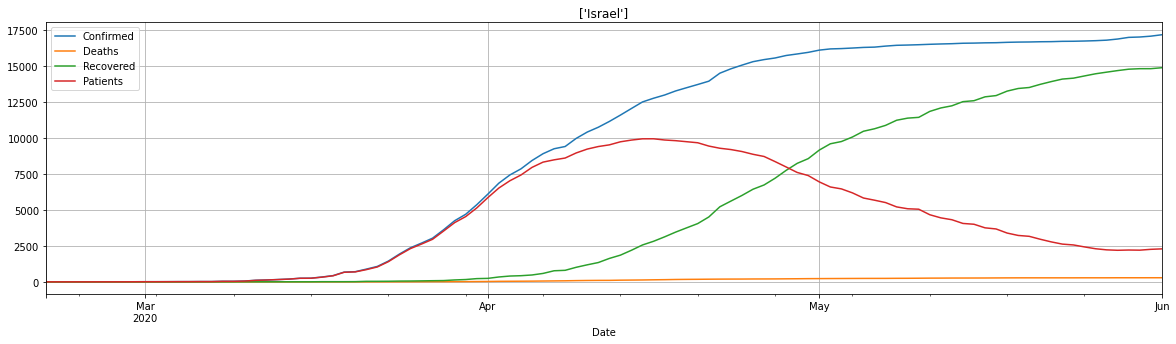

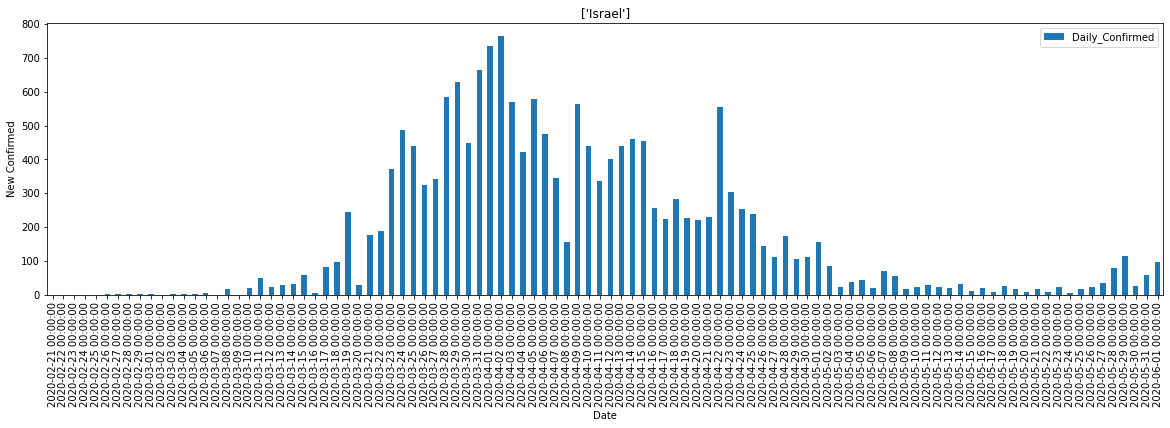

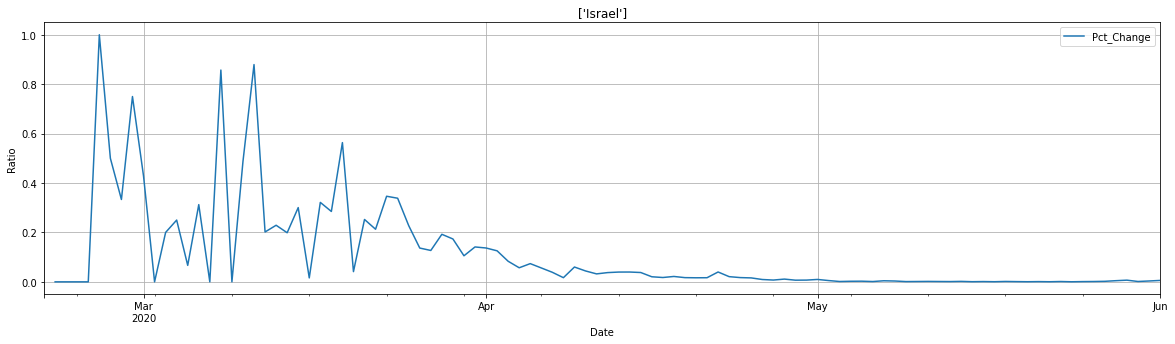

In [ ]:
dfc = country_data(df, "Israel")
draw_country_data(dfc)

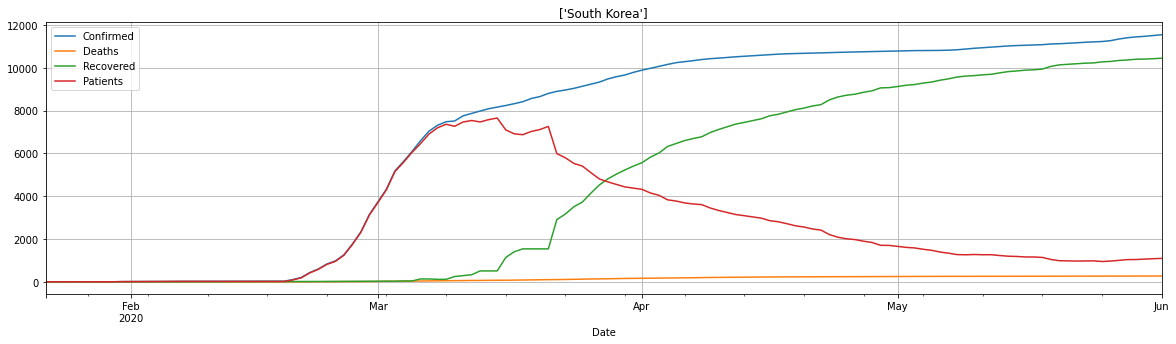

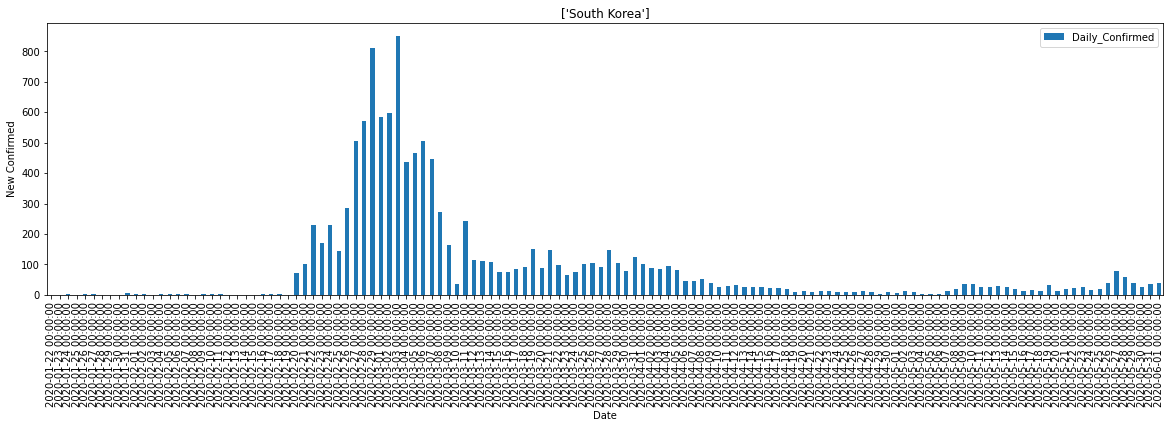

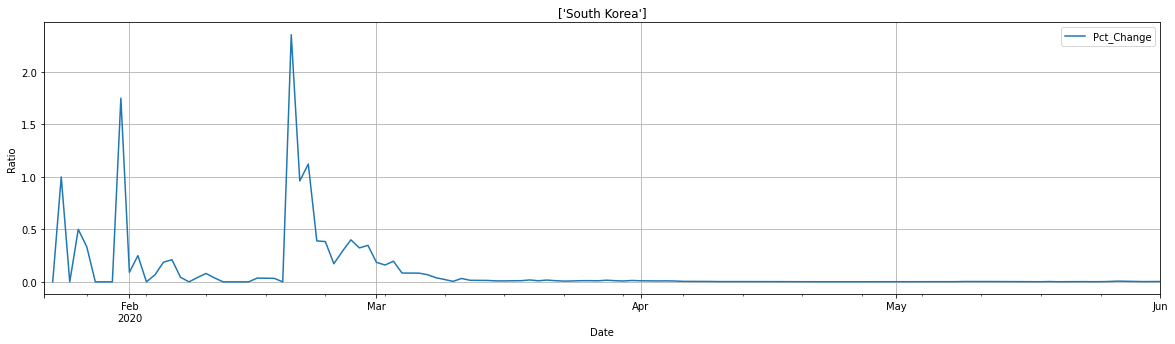

In [ ]:
dfc = country_data(df, "South Korea")
draw_country_data(dfc)

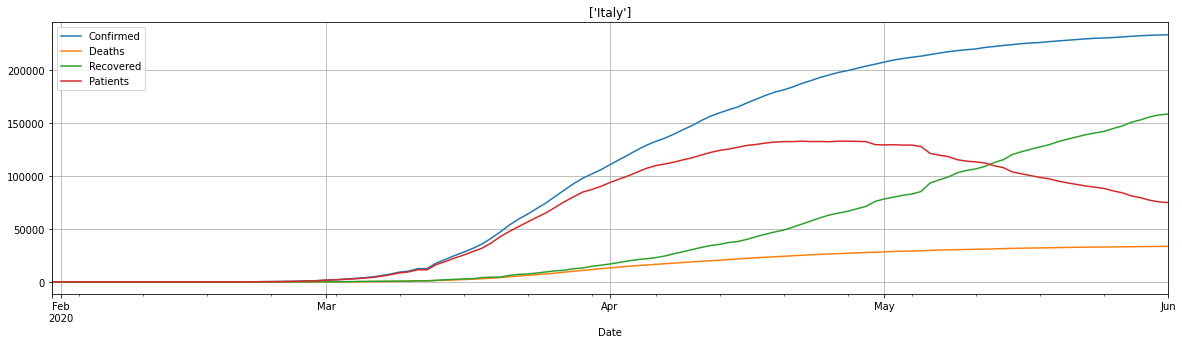

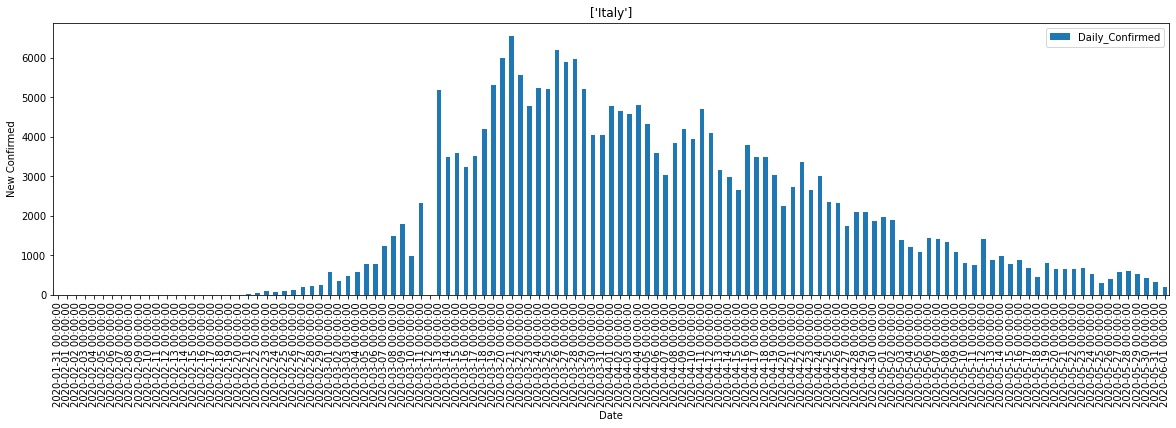

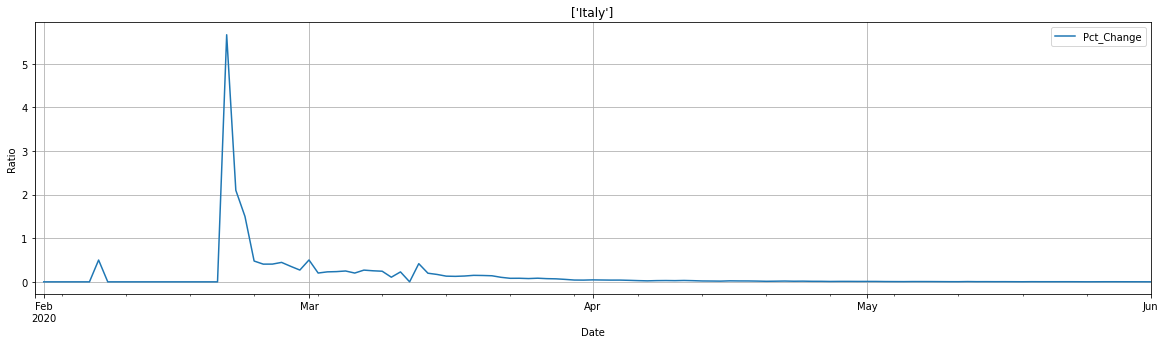

In [ ]:
dfc = country_data(df, "Italy")
draw_country_data(dfc)

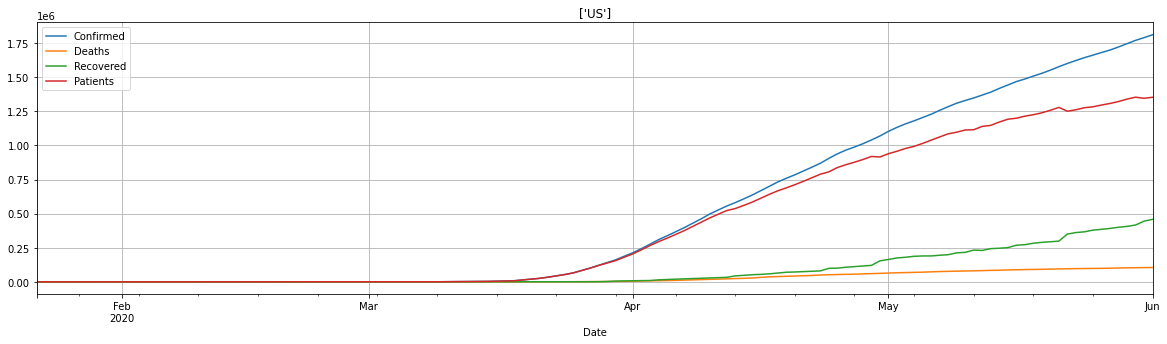

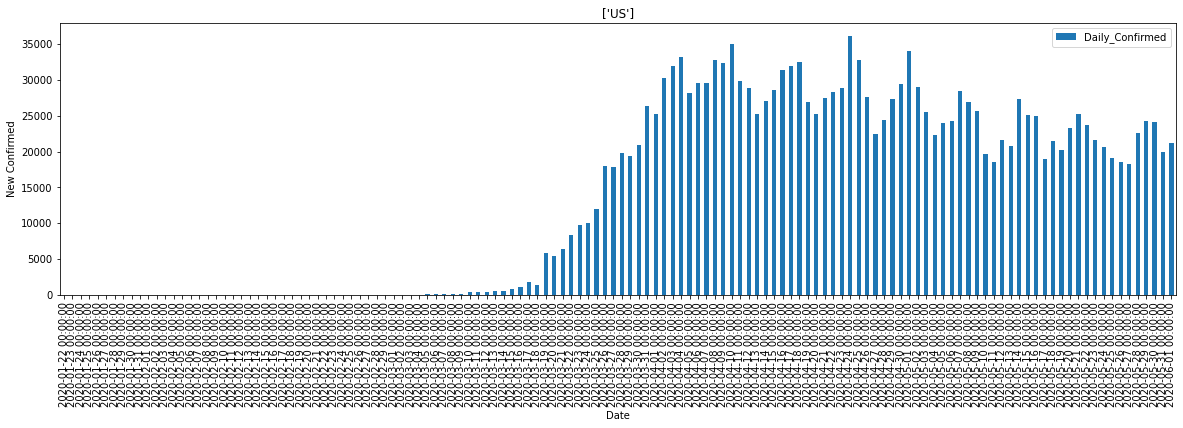

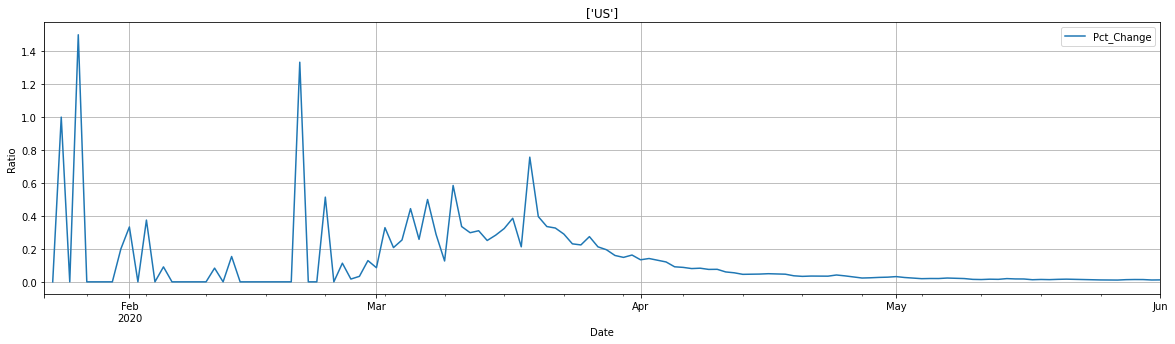

In [ ]:
# United States
d = country_data(df, "US")
draw_country_data(d)


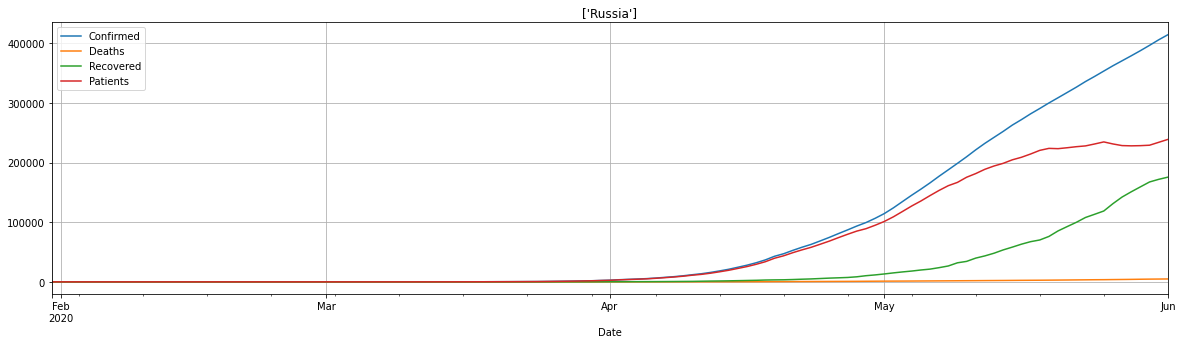

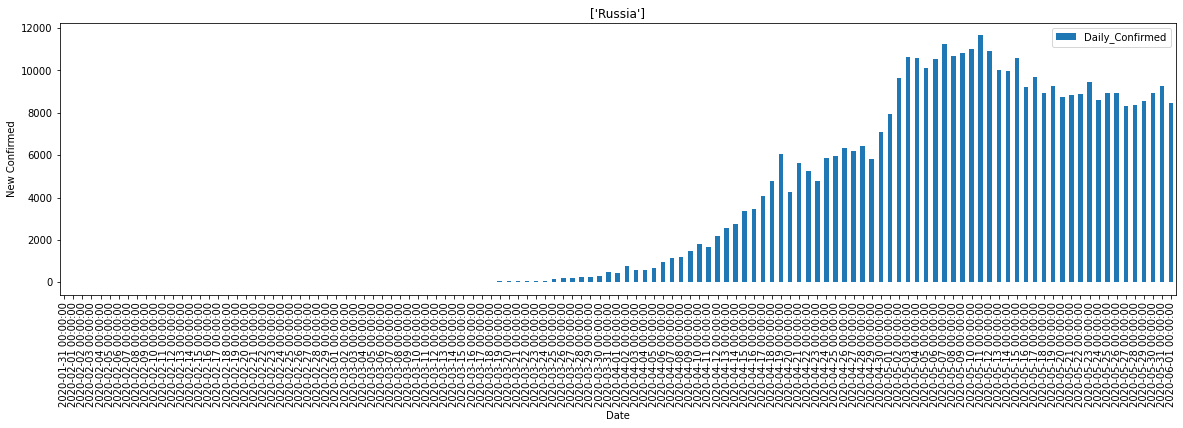

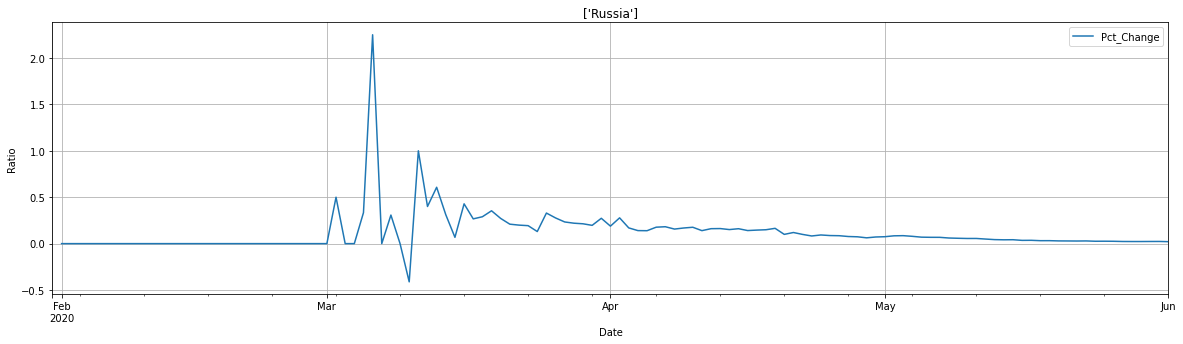

In [ ]:
# Russia
d = country_data(df, "Russia")
draw_country_data(d)


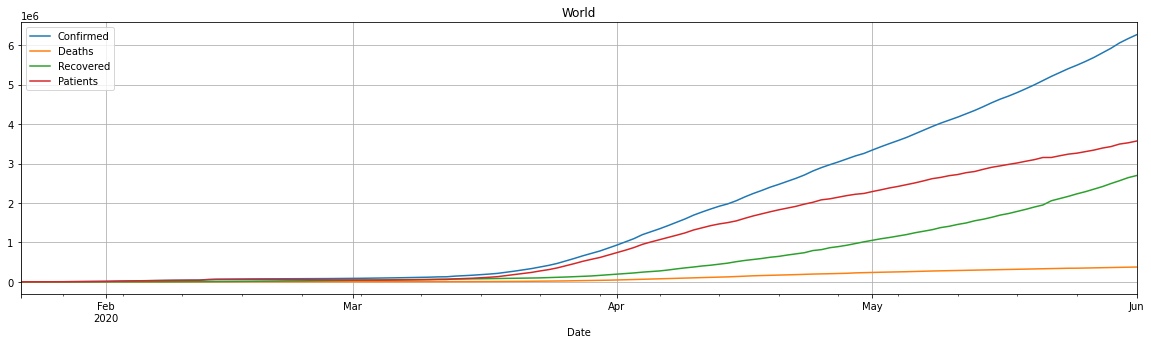

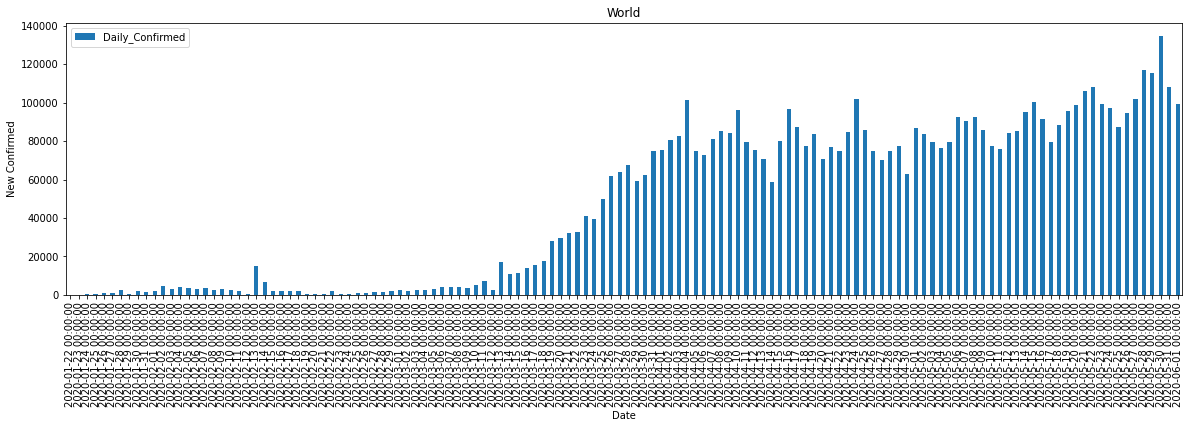

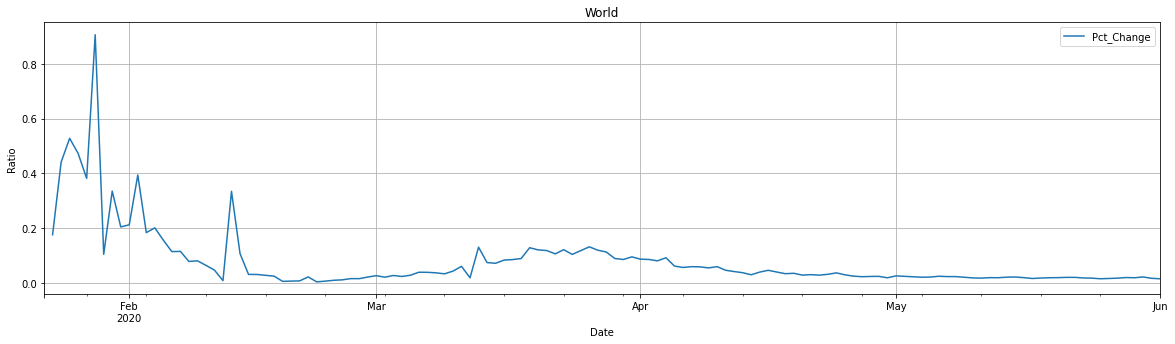

In [ ]:
# World
d = country_data(df, "World")
draw_country_data(d, "World")

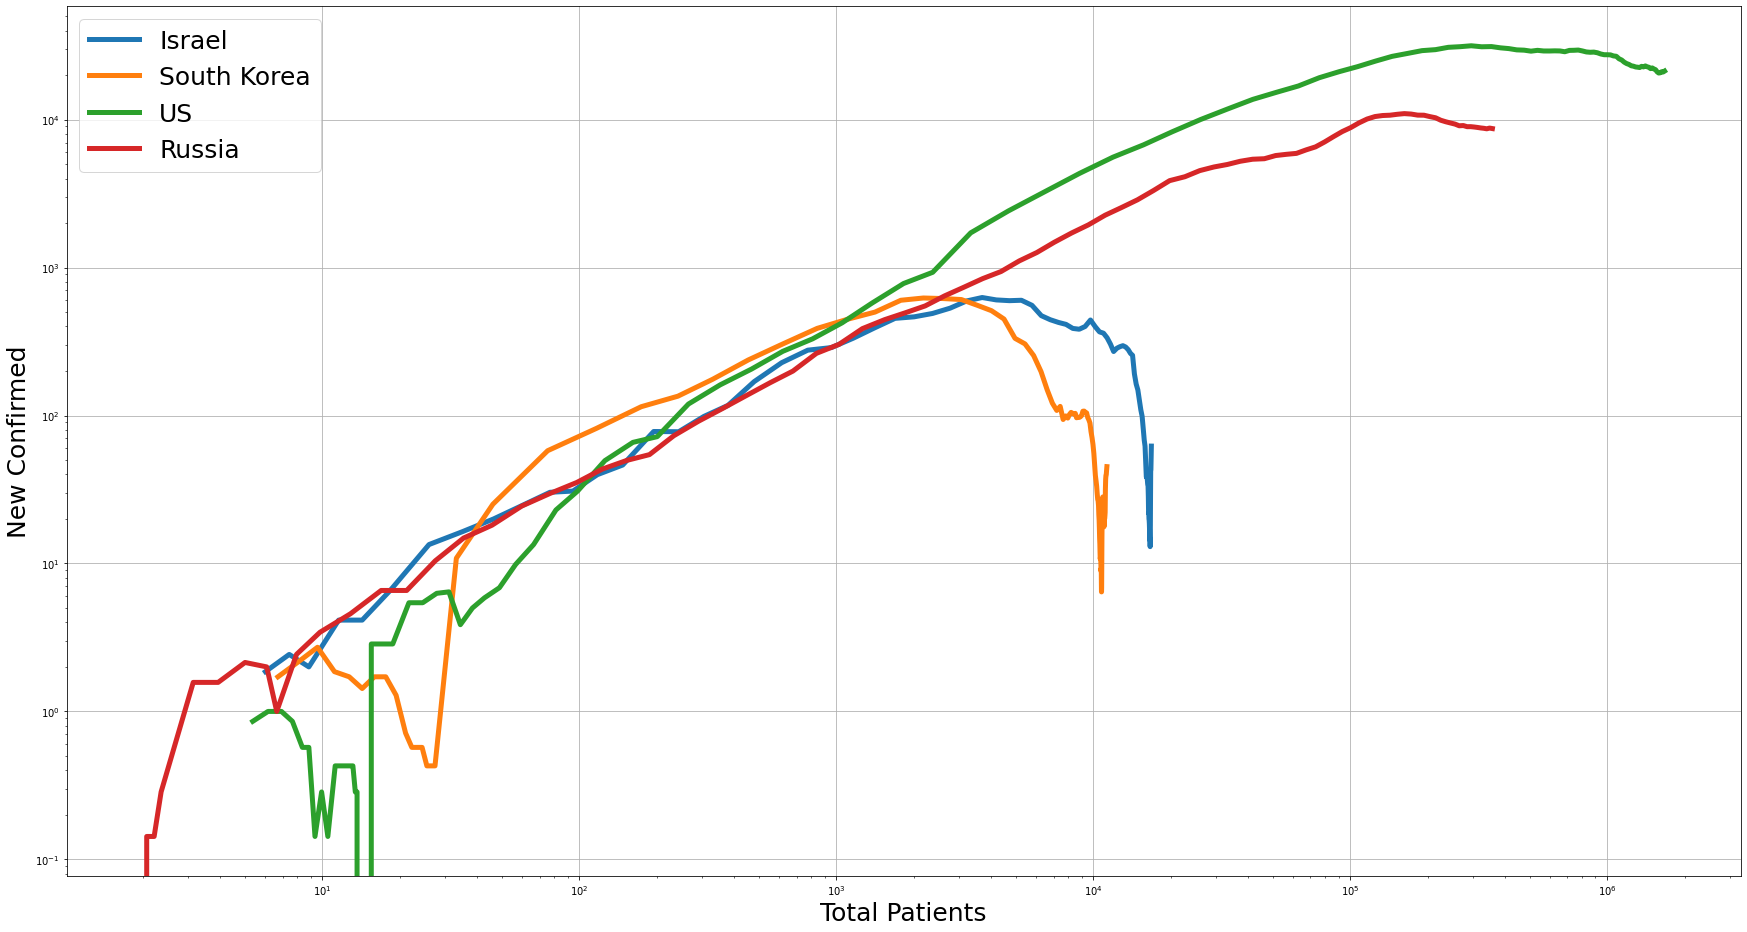

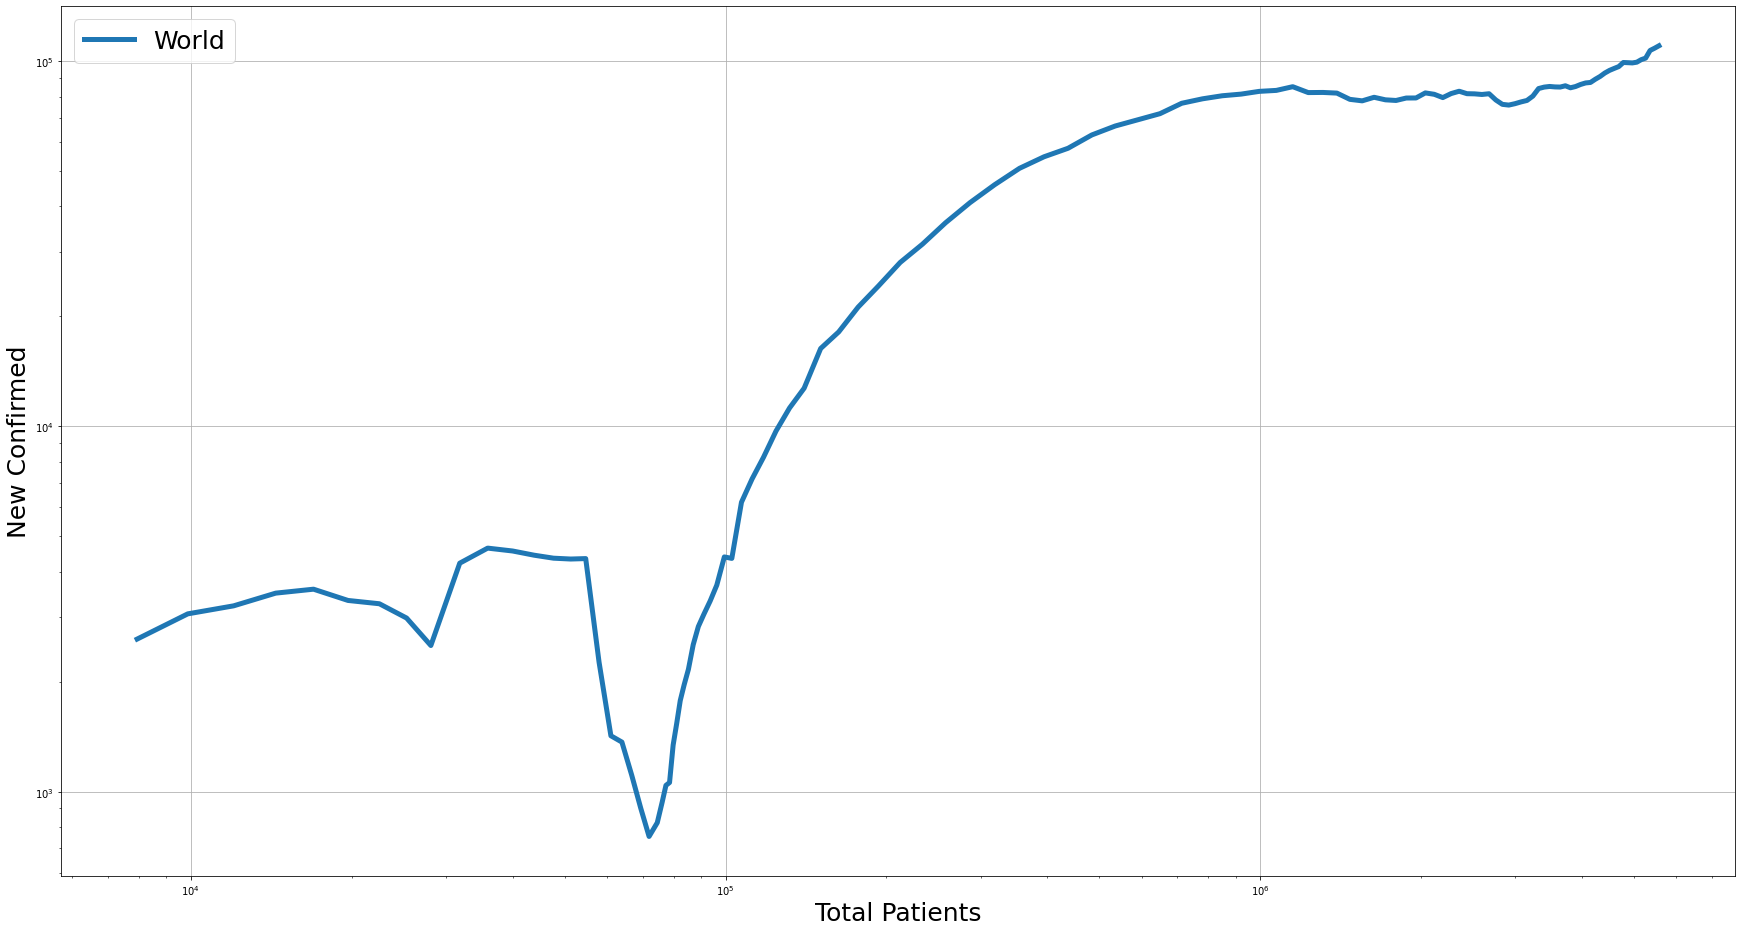

In [ ]:
def show_trend(df, countries, patients="Confirmed", new_patients="Daily_Confirmed", date="ObservationDate", is_sum=False):
    if type(countries) == type(""):
        countries = [countries]
    
    for country in countries:
        ndf = country_data(df, country).copy()
        ndf['aweek_sum'] = ndf[patients].rolling(window=14, axis=0).mean()
        if is_sum:
            ndf['aweek_new'] = ndf[new_patients].rolling(window=7, axis=0).sum()
        else:
            ndf['aweek_new'] = ndf[new_patients].rolling(window=7, axis=0).mean()
        ndf = ndf.dropna(axis=0)

        ndf = ndf.reset_index()
        ndf = ndf.set_index("aweek_sum")
        ndf.aweek_new.plot(grid=True, label=str(country), linewidth=5)
        
        
        
    plt.xscale("log")
    plt.yscale("log")
   
    plt.legend(fontsize=25)
    #plt.title(str(countries), size=25)
    plt.xlabel("Total Patients", size=25)
    plt.ylabel("New Confirmed", size=25)
    plt.show()

pylab.rcParams['figure.figsize'] = (30, 16)
show_trend(df, ["Israel","South Korea", "US", "Russia"])
show_trend(df, ["World"])

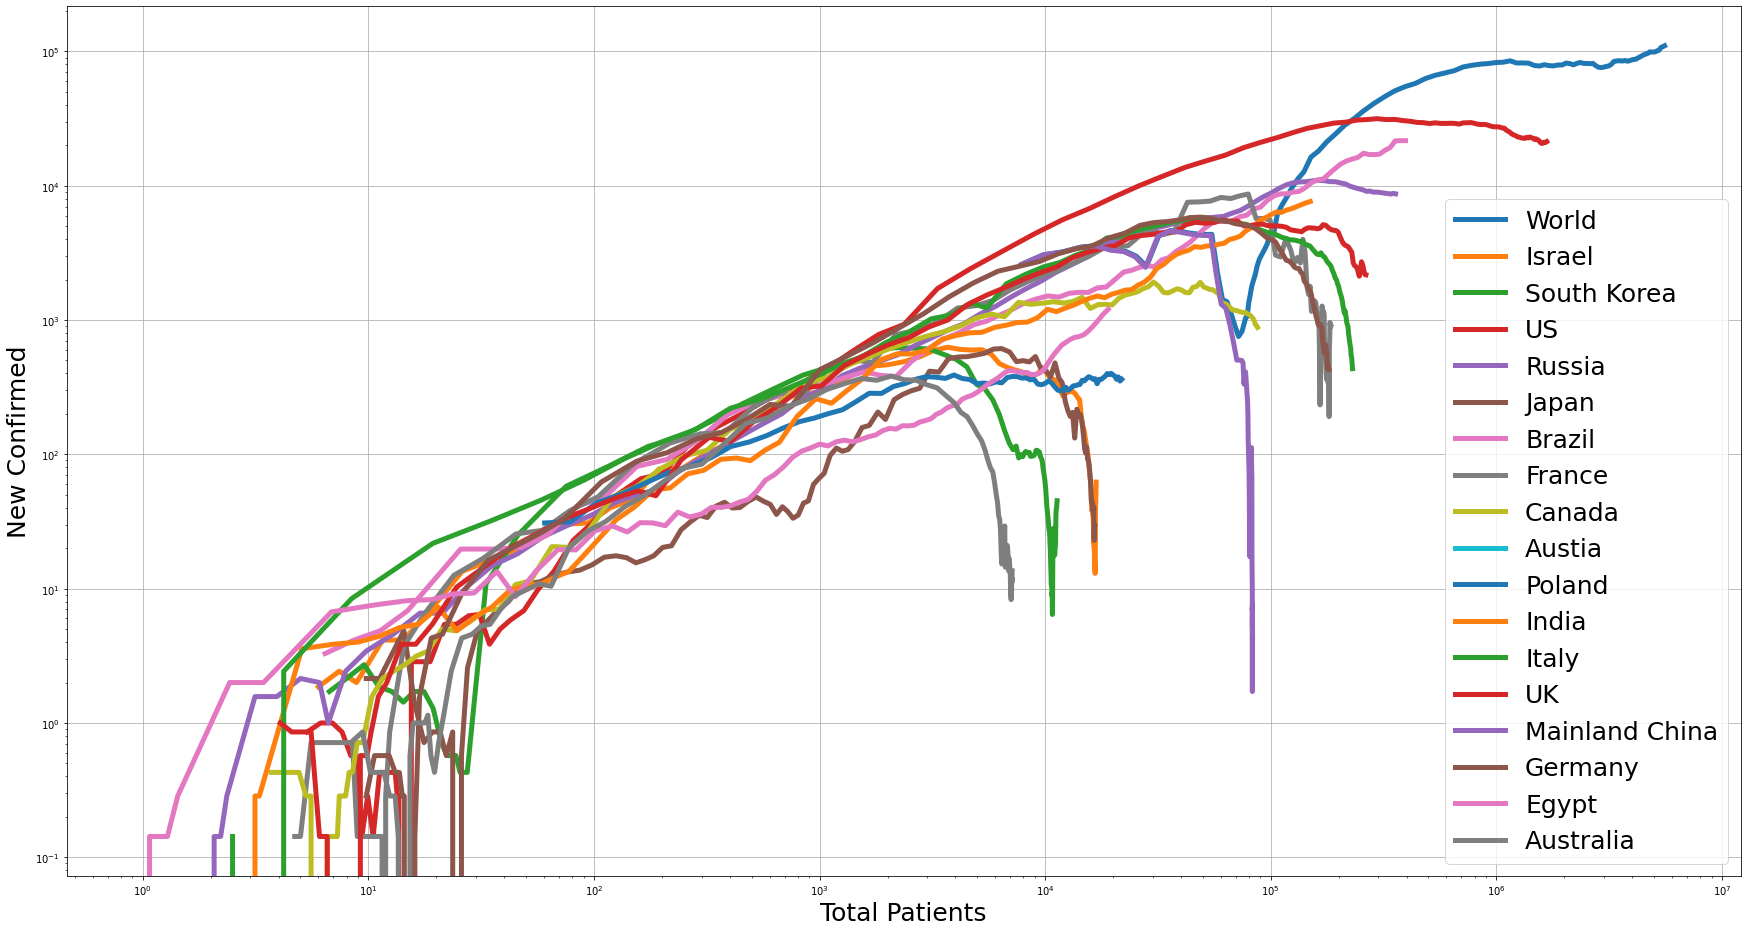

In [ ]:
show_trend(df, ["World", "Israel","South Korea", "US", "Russia", "Japan","Brazil","France","Canada","Austia","Poland","India","Italy","UK","Mainland China","Germany","Egypt", "Australia"])